Visualization to discover if $\mathbb{E}[cost(S_c,x)|f(x)=1] \leq \mathbb{E}[cost(S^*,x)|f(x)=1]$

These are my definitions: 
- n dice d sides per dice as always
- $S_c$ is the strategy seeking a color until all dice are exhausted 
- $S^*$ is the optimal strategy seeking to minimize $S^* = \arg\min\limits_S \mathbb{E}[\text{cost}(S, x)]$
- $S^+$ is the optimal strategy seeking to minimize the verification strategy knowing that $f(x)=1$ It performs all n tests if $f(x)=0$
- $S^-$ is the strategy iteratively choosing dice that maximizes the chance of finding a color hitherto unseen 

My goal is to compare the differences between $S_c$ and $S^*$ in the case where $d\leq\frac{n+1}{2}$ to ensure that the $n-d+1$ threashold of termination for $f(x)=0$ is above the $d$ threshold of termination for $f(x)=1$. We can already show that if $d>\frac{n+1}{2}$ then a d approximation is trivially true. 

To achieve this goal, I want to analyze a few things:
1. Strategies on a particular set of distributions
2. Strategies after shifting 1 dice so that 1 color encroaches on another color
3. Strategies after confirming a dice color and how that shifts $f(x)=1$

We will start with n = 3, 4 on d = 3. Give the colors orange, blue, green to the colors for visualization 

In [54]:
#We want to make sure that our vertical axis contains the the rolls, horizontal presents the probability 
#We also want to make color bars by the color it rolls depending on the order we check them 
#In addition, add the feature to indicate the color if we keep on rolling 
#group the graph by f(x)=1, f(x)=0, then a subsection of missing color 

from itertools import product

#lets take in the probabilities, the dice we are viewing, the color we are collecting, the strategy we are using
#this will output a set of bars to display 
color_map = {0: 'orange', 1: 'blue', 2: 'green'}
reverse_color_map = {v: k for k, v in color_map.items()}

def generate_outcomes(distribution, order, target_color, sorting_color):
    target_color = reverse_color_map[target_color]

    n = len(distribution)
    d = len(distribution[0])
    
    num_dice = len(order)
    color_count = len(distribution[0])  # assume all dice have same color support
    
    # Generate all possible outcomes (tuples like [1,2,3]) based on color options
    all_rolls = list(product(range(color_count), repeat=num_dice))

    #print(all_rolls)

    ordered = []
    
    for roll in all_rolls:
        prob = 1.0
        fx = -1 #indicates missing color 
        start = sorting_color[color_map[roll[0]]]
        
        color = [False] * d
        colorcount = 0
        locfound = n 
        
        for i, die_index in enumerate(order):
            color_idx = roll[i]
            prob *= distribution[die_index][color_idx]
            if color_idx == target_color:
                locfound = min(locfound,i)
                fx = 1
            if color[color_idx] == False:
                colorcount += 1 
                color[color_idx] = True 
            
        if colorcount != 3 and fx == 1:
            fx = 0

        outcome = {
            'rolls': roll[:locfound + 1],  
            'prob': prob,
            'index': (fx, start),
            #the fx means 1 if contains all colors and f(x)=1, 
            #f(x)=0 if missing colors but contains the c, 
            #f(x)= -1 if missing colors and missing c
        }
        ordered.append(outcome)
    
            
    # Now categorize:
    outcomes_sorted = sorted(ordered, key=lambda o: o['index'])
    return outcomes_sorted

In [51]:
import matplotlib.pyplot as plt

# Example outcomes: rolls and associated probabilities (must sum to 1)

#outcomes will be set as certain dice with certain orientations [3, 1, 2] to say that the third dice is displayed first 
#maybe I will generaize and somehow display other strategies later but right now i can't be bothered 

def display(outcomes, color_map, strategy):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    current_x = 0  # Start at leftmost x = 0
    flag = True 
    
    for outcome in outcomes:
        rolls = outcome['rolls']
        prob = outcome['prob']
        bottom = 0
        
        if flag and outcome['index'][0] == 1:
            ax.axvline(x=current_x, color='red', linewidth=0.2)
            flag = False 
        
        for roll in rolls:
            ax.bar(
                x=current_x, height=1, width=prob,
                bottom=bottom, color=color_map[roll], align='edge', edgecolor='black'
            )
            bottom += 1
        current_x += prob  # Shift to the next bar's starting position
    
    # Configure axes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(len(o['rolls']) for o in outcomes) + 1)
    ax.set_xlabel('Probability (sum = 1)')
    ax.set_ylabel('Roll Index (bottom = first roll)')
    ax.set_title('Outcome Visualization by Color and Probability')
    plt.tight_layout()
    plt.show()




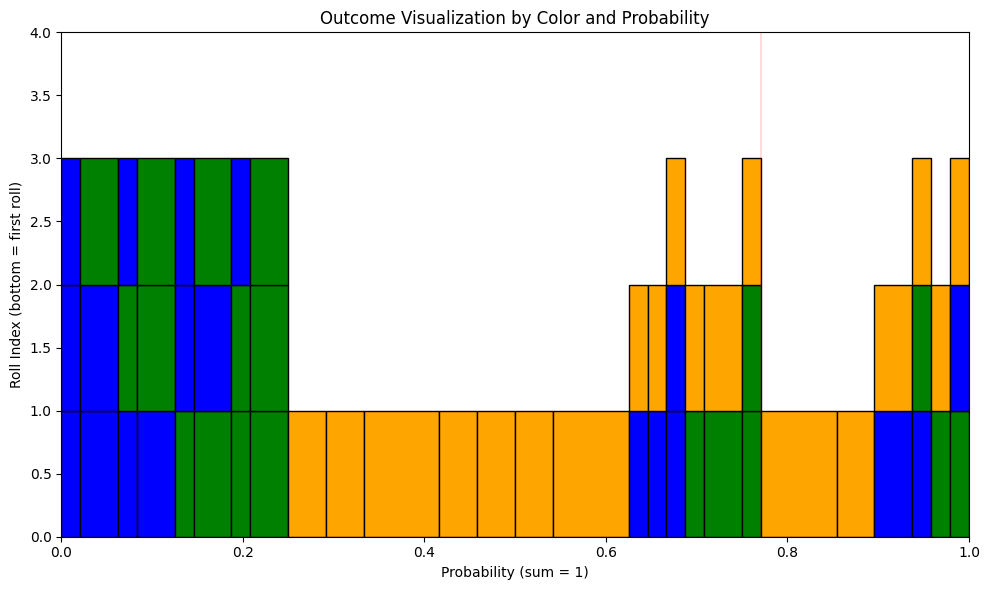

In [60]:
distribution = [[0.25, 0.25, 0.5], [1/3, 1/3, 1/3], [0.5, 0.25, 0.25]]
order = [2, 1, 0] #from highest to lowest for orange 


outcomes = generate_outcomes(distribution, order, 'orange', {'orange':0, 'blue':1, 'green':2})
display(outcomes, color_map, "hall")

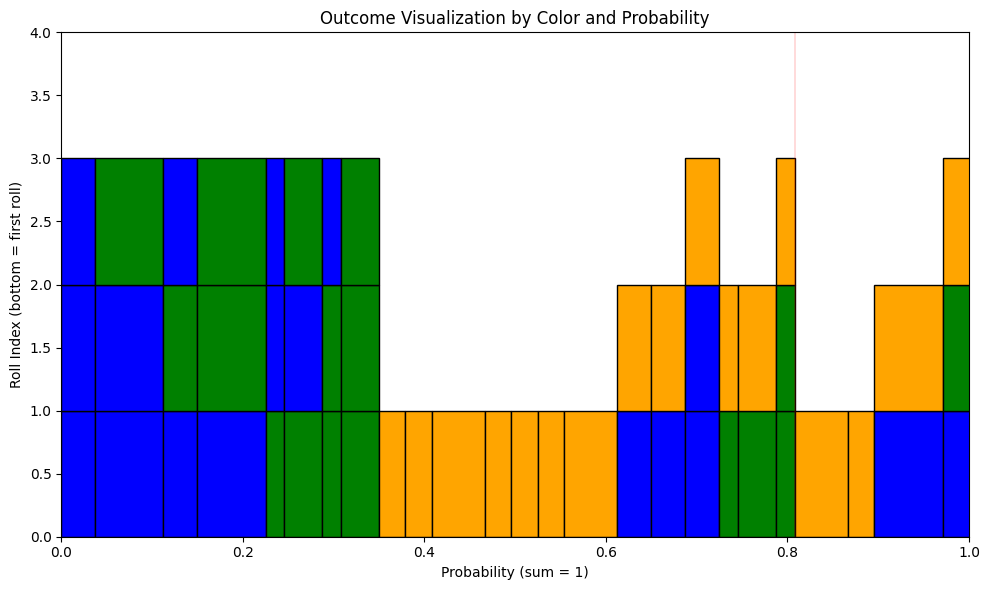

In [61]:
distribution = [[0.25, 0.25, 0.5], [1/3, 1/3, 1/3], [0.35, 0.45, 0.25]]
order = [2, 1, 0] #from highest to lowest for orange 


outcomes = generate_outcomes(distribution, order, 'orange', {'orange':0, 'blue':1, 'green':2})
display(outcomes, color_map, "hall")

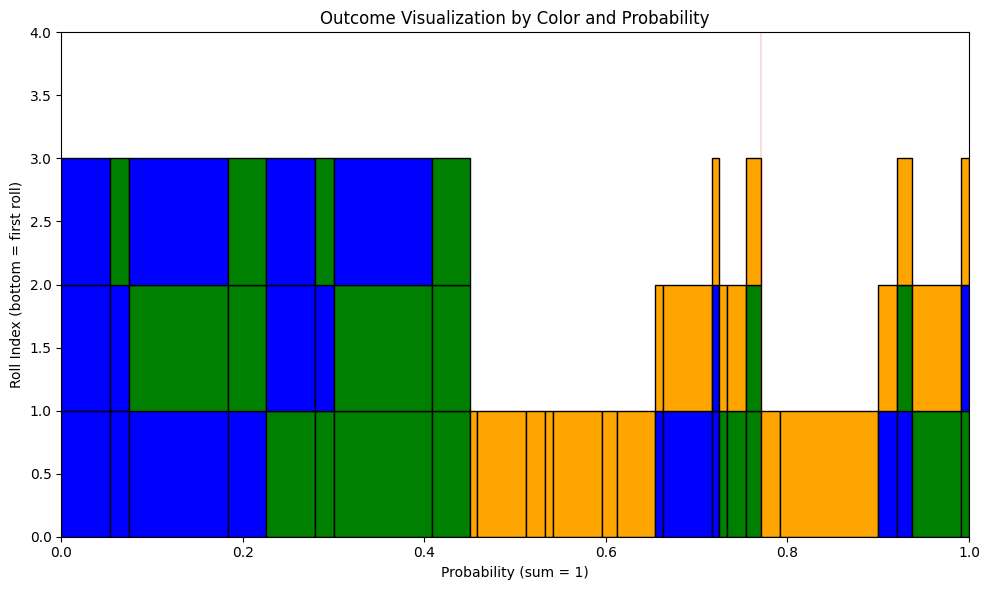

In [62]:
distribution = [[0.25, 0.25, 0.5], [1/3, 1/3, 1/3], [0.10, 0.65, 0.25]]
order = [1, 0, 2] #from highest to lowest for orange 


outcomes = generate_outcomes(distribution, order, 'orange', {'orange':0, 'blue':1, 'green':2})
display(outcomes, color_map, "hall")